# Inference 

In [15]:
import os
import torch
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import torchvision
import numpy as np
from PIL import Image

from func import KneeDataset
from model import UNet

In [16]:
# Check GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print("Device: ", device)

Device:  cpu


In [17]:
device

device(type='cpu')

In [18]:
batch_size_test = 1
lr = 0.0001
momentum = 0.9

In [19]:
base_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
])

test_dataset = KneeDataset('./data/test_knee/', transform=base_transform)

test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size_test, shuffle=False)

In [20]:
# Load model
net = UNet().to(device)

# optimizer = torch.optim.SGD(net.parameters(), lr=lr, momentum=momentum)

ckpt = torch.load('best_unet.pt', map_location=torch.device('cpu'))

# ckpt = torch.load('best_unet.pt')
    
net.load_state_dict(ckpt['model_state_dict'])
# optimizer.load_state_dict(ckpt['optimizer_state_dict'])

<All keys matched successfully>

In [21]:
with torch.no_grad():
    net.eval()
    i = 0
    for img, mask in test_data_loader:
        inputs = img.to(device)
        labels = mask.to(device)
        outputs = net(inputs)
        
#         print(labels)
        
        inputs = inputs.squeeze()
        labels = labels.squeeze()
        outputs = outputs.squeeze()

        
        print(outputs.shape)
        print(labels.shape)
        print(inputs.shape)
        
#         print(outputs.min())
#         print(outputs.max())
#         print(outputs.mean())
        
        mean = outputs.mean()
        std = outputs.std()
        
#         print(inputs.mean())
        
#         print(outputs)
        
        pred = np.logical_not(outputs < 0.5)
#         plt.imshow(pred, cmap='gray')
#         plt.imshow(outputs)

#         plt.imsave(f"./result/{i}_inputs.png", inputs, cmap='gray')
#         plt.imsave(f"./result/{i}_labels.png", labels, cmap='gray')
#         plt.imsave(f"./result/{i}_pred.png", pred, cmap='gray')

        i += 1
        break
        
print("Success save")

torch.Size([512, 512])
torch.Size([512, 512])
torch.Size([512, 512])
Success save


In [13]:
labels

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)

In [14]:
outputs

tensor([[-2.2242, -2.7009, -3.0700,  ..., -0.9368, -1.4428, -0.1312],
        [-2.2000, -3.6348, -3.9317,  ..., -1.3387, -1.5971, -0.8881],
        [-2.7063, -4.1896, -4.6566,  ..., -2.2148, -2.2256, -1.5683],
        ...,
        [-2.5259, -4.6518, -4.6042,  ..., -4.0746, -4.1042, -2.6574],
        [-2.4575, -3.4716, -4.0996,  ..., -3.8654, -3.3773, -2.1887],
        [-1.2068, -2.1542, -2.3234,  ..., -1.7216, -2.0594, -1.5840]])

----------------

------------------


In [36]:
lst = os.listdir('./test/')
lst

['0_pred.png', '0_pred_1.png', '0_pred_2.png']

In [9]:
img_1 = Image.open('./test/' + lst[0])
img_1_arr = np.array(img_1)
img_1_arr.mean()

165.39591121673584

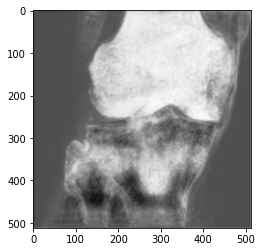

In [13]:
plt.imshow(img_1_arr)

In [39]:
img_2 = Image.open('./test/' + lst[1]).convert('L')
img_2_arr = np.array(img_2)
img_2_arr.mean()

135.52788162231445

In [40]:
img_2_arr

array([[142, 125, 130, ..., 162, 162, 161],
       [ 93,  71,  72, ..., 152, 155, 144],
       [ 99,  73,  72, ..., 140, 163, 146],
       ...,
       [103,  78,  79, ...,  70,  91, 123],
       [110,  99,  85, ...,  78,  94, 136],
       [139, 125, 131, ..., 113, 138, 149]], dtype=uint8)

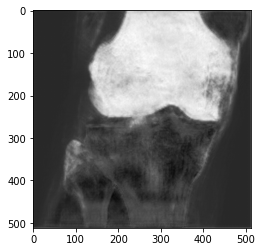

In [12]:
plt.imshow(img_2_arr)

In [20]:
img_2_arr.shape

(512, 512, 4)

In [21]:
img_1_arr.shape

(512, 512, 4)

In [41]:
img = Image.open('./test/' + lst[0]).convert('L')

print(np.array(img).mean())
np.array(img)

94.56834030151367


array([[ 95,  78,  73, ...,  89,  89, 100],
       [ 60,  43,  40, ...,  81,  85,  91],
       [ 60,  43,  34, ...,  78,  76,  93],
       ...,
       [ 70,  39,  44, ...,  35,  59,  67],
       [ 80,  64,  69, ...,  62,  73,  73],
       [ 89,  77,  70, ...,  62,  81,  88]], dtype=uint8)

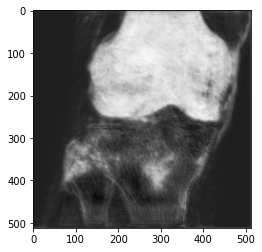

In [38]:
plt.imshow(np.array(img), cmap='gray')